In [38]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from agents.networks.gru_rnn import GRU_RNN

In [39]:
HIDDEN_SIZE = 32
INPUT_SIZE = 1
DEVICE = 'cuda'
LEARNING_RATE = 1e-3
VAR_NOISE = 1e-4

In [40]:
network_untrained = GRU_RNN(
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    device=DEVICE,
    var_noise=VAR_NOISE,
)

load_path = '../../results/line_attr_supervised/4_unit_line_v2_2024-12-06_01_42_31_795787_var_noise_5e-05_activity_weight_1e-07/rnn_weights/000999.h5'
network_untrained.load_state_dict(torch.load(load_path, weights_only=True))

<All keys matched successfully>

In [41]:
w_hh_untrained = network_untrained.rnn.weight_hh.detach().cpu().numpy()
b_hh_untrained = network_untrained.rnn.bias_hh.detach().cpu().numpy()
w_ih_untrained = network_untrained.rnn.weight_ih.detach().cpu().numpy()
b_ih_untrained = network_untrained.rnn.bias_ih.detach().cpu().numpy()

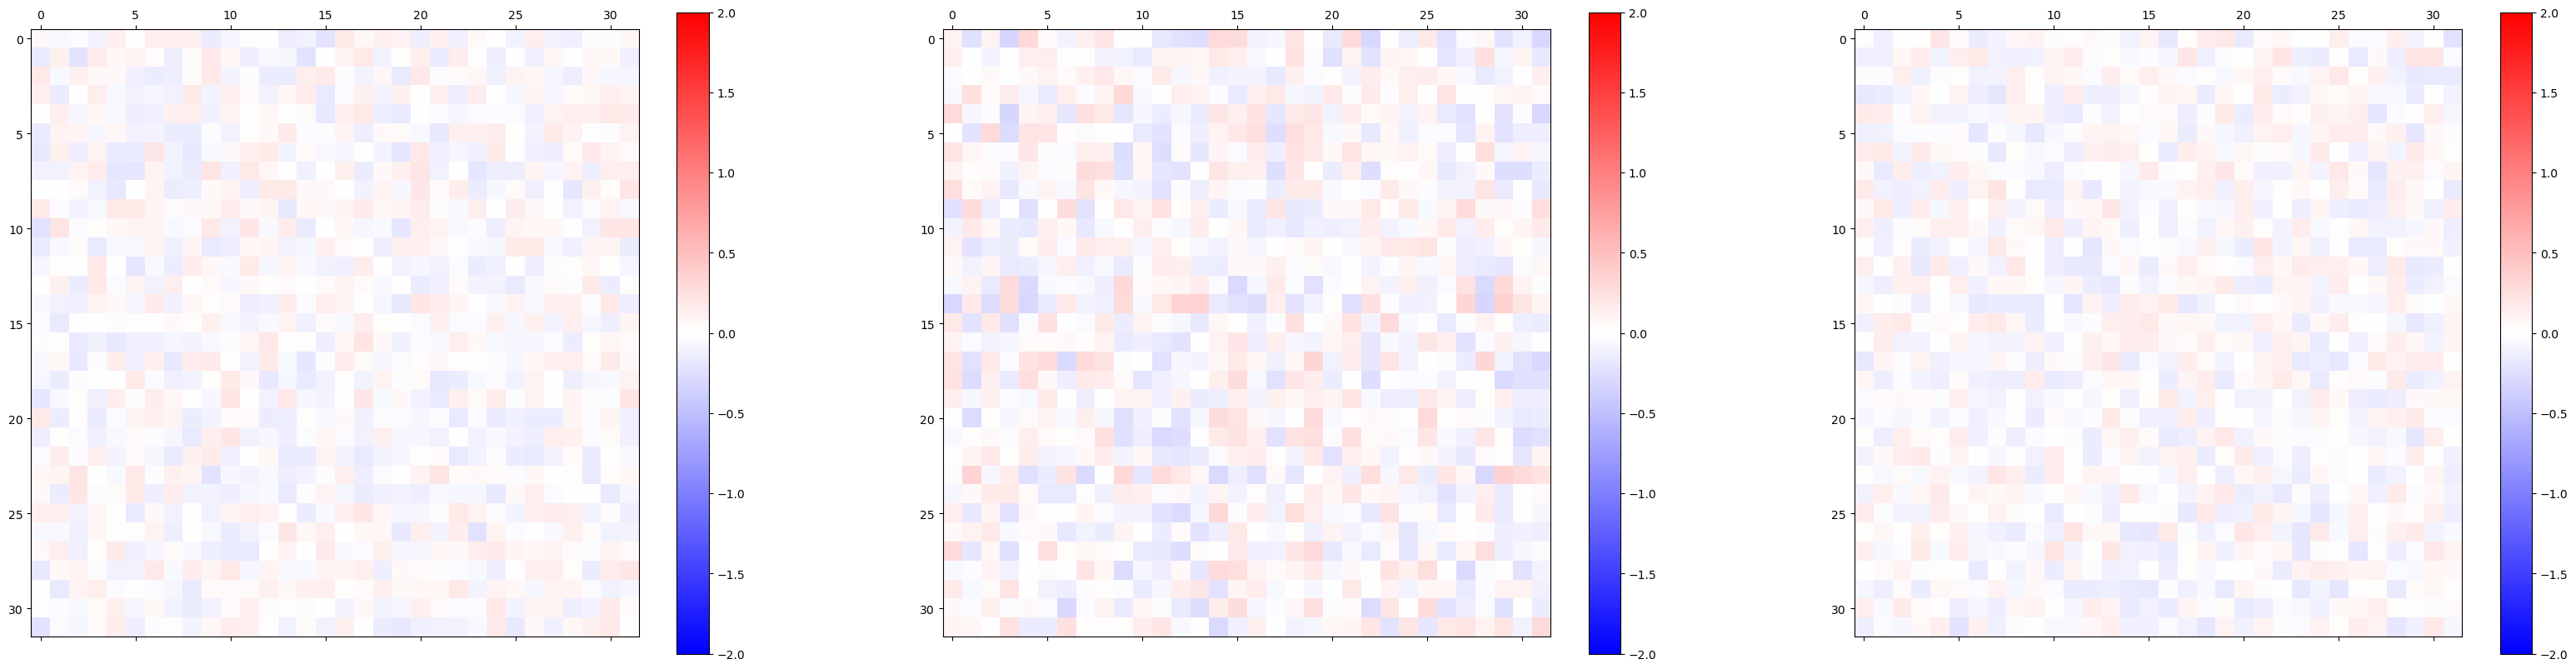

In [42]:
scale = 10
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = 2
for k in range(3):
    cbar = axs[k].matshow(w_hh_untrained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [43]:
network_trained = GRU_RNN(
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    device=DEVICE,
    var_noise=VAR_NOISE,
)

load_path = '../../results/line_attr_supervised/4_unit_line_v2_2024-12-06_01_42_31_795787_var_noise_5e-05_activity_weight_1e-07/rnn_weights/043999.h5'
network_trained.load_state_dict(torch.load(load_path, weights_only=True))

<All keys matched successfully>

In [44]:
w_ih_trained = network_trained.rnn.weight_ih.detach().cpu().numpy()

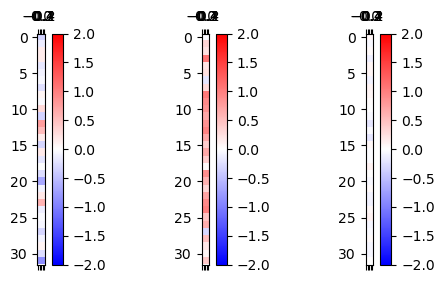

In [45]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(2 * scale, 1 * scale))

m = 2
for k in range(3):
    cbar = axs[k].matshow(w_ih_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [46]:
w_hh_trained = network_trained.rnn.weight_hh.detach().cpu().numpy()
b_hh_trained = network_trained.rnn.bias_hh.detach().cpu().numpy()
w_ih_trained = network_trained.rnn.weight_ih.detach().cpu().numpy()
b_ih_trained = network_trained.rnn.bias_ih.detach().cpu().numpy()

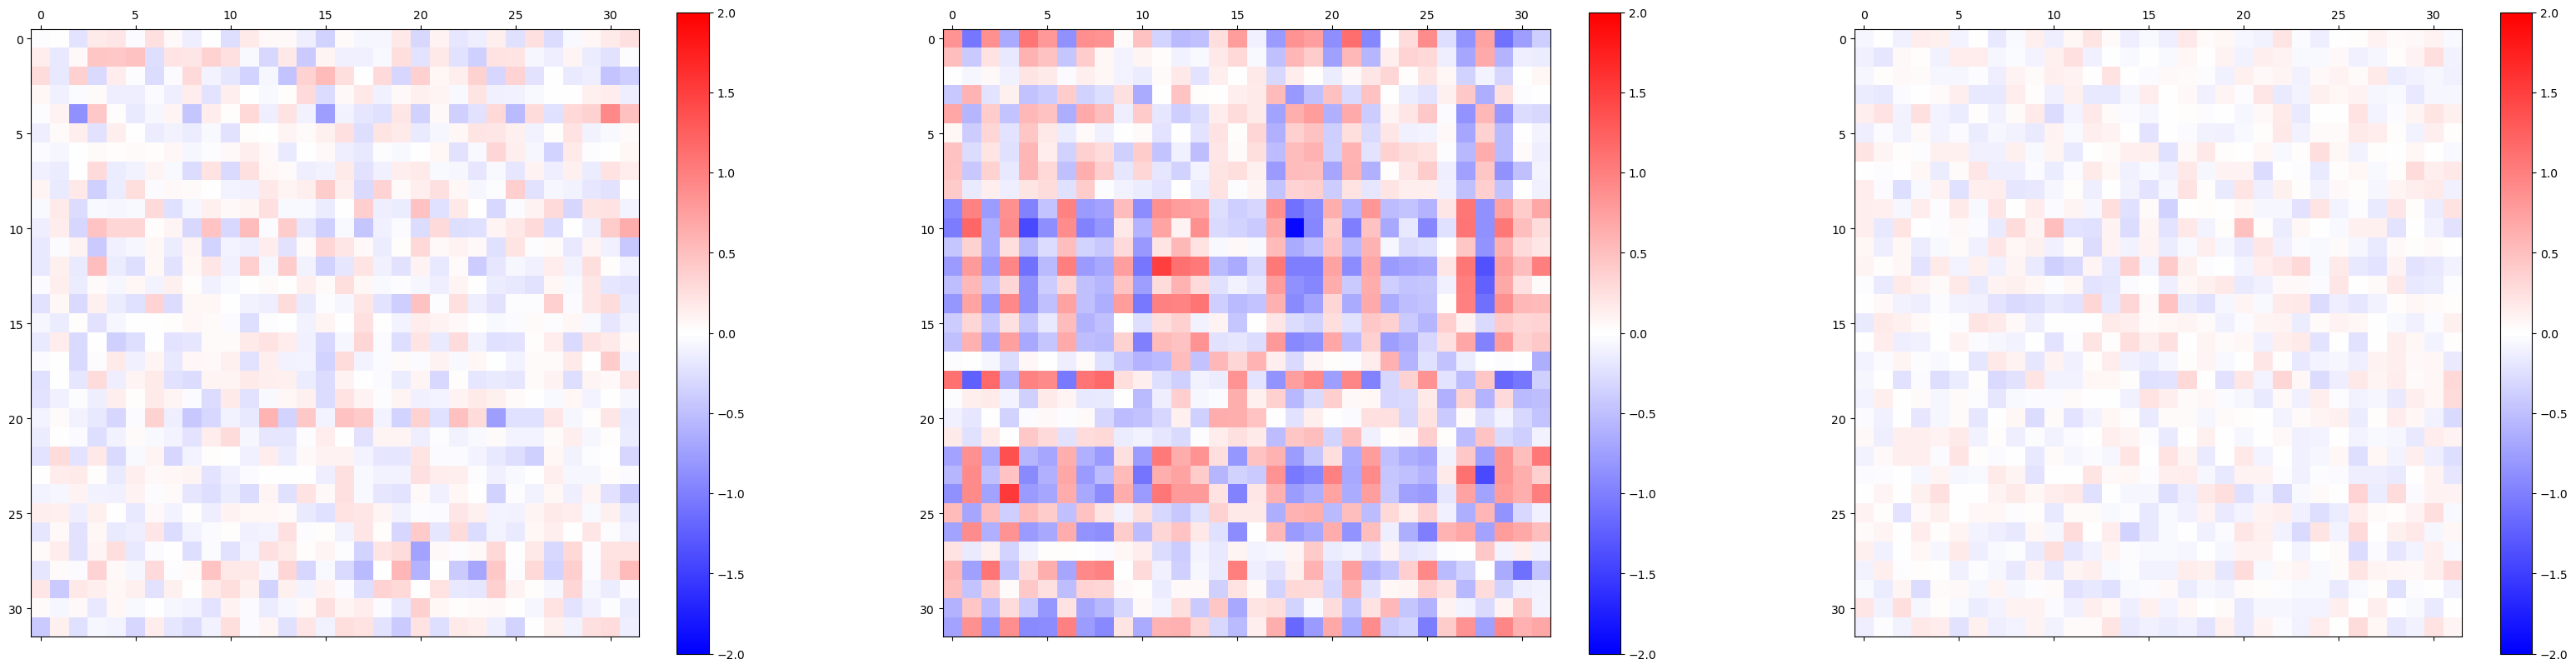

In [47]:
scale = 10
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = 2

for k in range(3):
    cbar = axs[k].matshow(w_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE], vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [48]:
w_hh_trained_r = w_hh_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_hh_trained_z = w_hh_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_hh_trained_n = w_hh_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

w_hh_untrained_r = w_hh_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_hh_untrained_z = w_hh_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_hh_untrained_n = w_hh_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

b_hh_trained_r = b_hh_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_hh_trained_z = b_hh_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_hh_trained_n = b_hh_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

b_hh_untrained_r = b_hh_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_hh_untrained_z = b_hh_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_hh_untrained_n = b_hh_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

w_ih_trained_r = w_ih_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_ih_trained_z = w_ih_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_ih_trained_n = w_ih_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

w_ih_untrained_r = w_ih_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE, :]
w_ih_untrained_z = w_ih_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE, :]
w_ih_untrained_n = w_ih_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE, :]

b_ih_trained_r = b_ih_trained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_ih_trained_z = b_ih_trained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_ih_trained_n = b_ih_trained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

b_ih_untrained_r = b_ih_untrained[0 * HIDDEN_SIZE:1 * HIDDEN_SIZE]
b_ih_untrained_z = b_ih_untrained[1 * HIDDEN_SIZE:2 * HIDDEN_SIZE]
b_ih_untrained_n = b_ih_untrained[2 * HIDDEN_SIZE:3 * HIDDEN_SIZE]

[[ 0.84043294 -1.0699794   0.87262064 ... -1.1071854  -0.7588953
  -0.37847525]
 [ 0.51546925 -0.40900776  0.22537023 ... -0.5848244  -0.13366285
  -0.15225703]
 [-0.01347264 -0.07219854  0.05621422 ... -0.32290423  0.00281383
   0.07578008]
 ...
 [ 0.51439303 -0.45838374  0.38869166 ... -0.35648686 -0.13198227
  -0.09987113]
 [-0.6022923   0.44203082 -0.5268378  ...  0.10735445  0.44839814
  -0.09009789]
 [-0.71601415  0.8683977  -0.8198627  ...  0.94986403  0.62247896
   0.69017416]]
(5.125843+0j)
[-0.2502848 +0.j -0.10542005+0.j  0.0265602 +0.j  0.13008694+0.j
 -0.14654942+0.j -0.03107775+0.j -0.10049061+0.j -0.126754  +0.j
 -0.069348  +0.j  0.26190275+0.j  0.25378448+0.j  0.15001123+0.j
  0.30134773+0.j  0.15554427+0.j  0.24581042+0.j  0.1381154 +0.j
  0.13872851+0.j -0.03459166+0.j -0.261908  +0.j -0.04134668+0.j
 -0.02568283+0.j -0.10100512+0.j  0.27626404+0.j  0.20344983+0.j
  0.30077198+0.j -0.12242351+0.j  0.21873924+0.j -0.08159731+0.j
 -0.18162015+0.j -0.06773163+0.j  0.1233

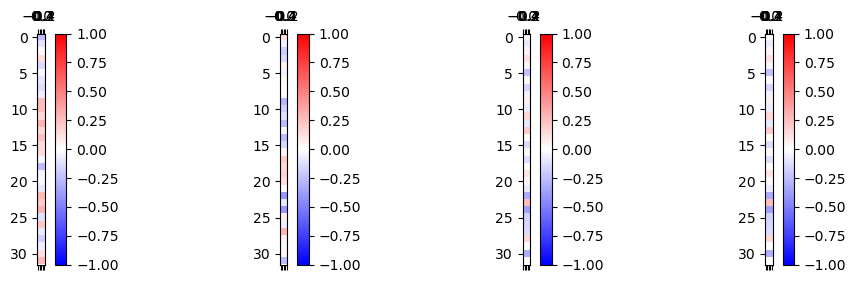

In [49]:
print(w_hh_trained_z)
scale = 3
fig, axs = plt.subplots(1, 4, figsize=(4 * scale, 1 * scale))
res = np.linalg.eig(w_hh_trained_z)
m = 1
for i in range(4):
    print(res.eigenvalues[i])
    print(res.eigenvectors[:, i])
    cbar = axs[i].matshow(np.real(res.eigenvectors[:, i]).reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

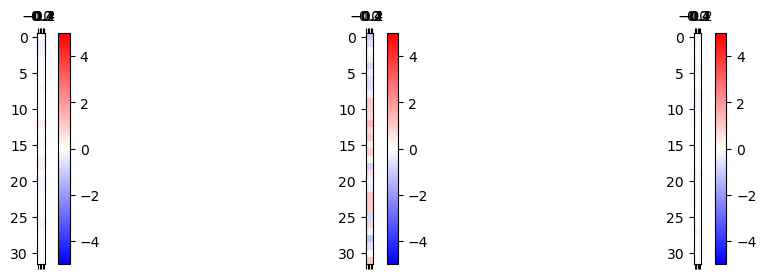

In [50]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = 5

for k in range(3):
    cbar = axs[k].matshow(b_hh_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

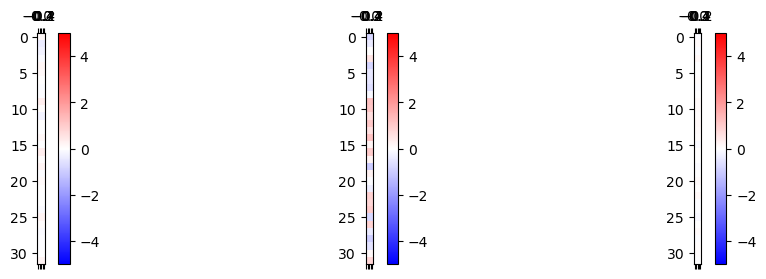

In [51]:
scale = 3
fig, axs = plt.subplots(1, 3, figsize=(4 * scale, 1 * scale))

m = 5

for k in range(3):
    cbar = axs[k].matshow(b_ih_trained[k * HIDDEN_SIZE:(k+1) * HIDDEN_SIZE].reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
    plt.colorbar(cbar)

In [52]:
def load_hidden_activity(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [53]:
data = load_hidden_activity(
    '../../results/line_attr_supervised/32_unit_markov_early_endings_test_2024-12-06_09_35_19_995193_var_noise_5e-05_activity_weight_1e-07/hidden_states/*.npy'
)

In [54]:
print(data.shape)

(2000, 32, 500)


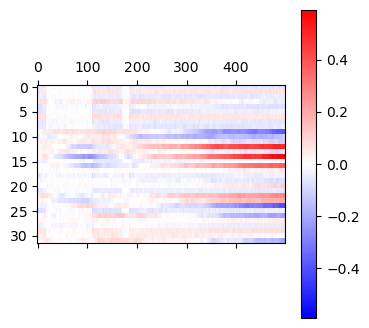

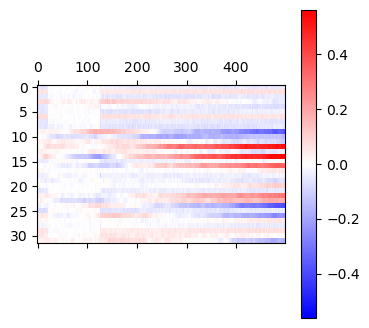

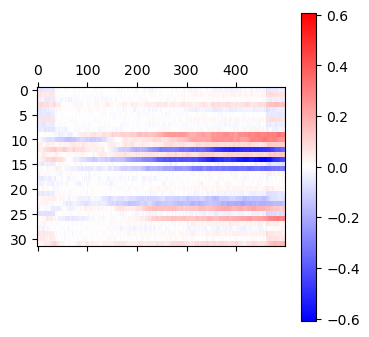

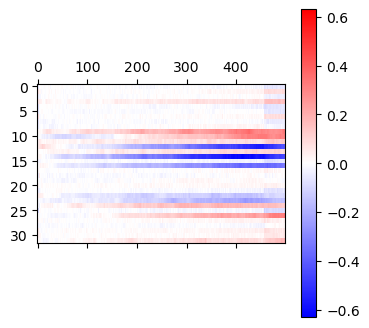

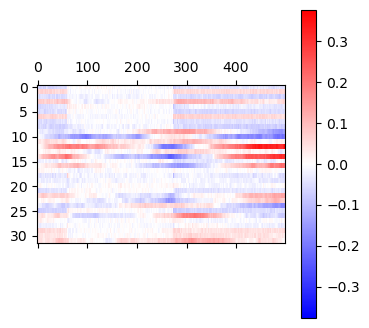

In [55]:
for k in range(0, 100, 20):
    hidden_activity = data[k, ...]
    
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
    
    m = np.abs(hidden_activity).max()
    cbar = axs.matshow(hidden_activity, vmin=-m, vmax=m, cmap='bwr', aspect=10)
    plt.colorbar(cbar)

In [56]:
data_ = np.transpose(data, [1, 0, 2])
flattened_data = data_.reshape(data_.shape[0], data_.shape[1] * data_.shape[2])
print(data_.shape)
print(flattened_data.shape)
pca = PCA()
pc_activities = pca.fit_transform(flattened_data.T)
pc_activities = pc_activities.T.reshape(data_.shape)
print(pc_activities.shape)
explained_variance_ratios = pca.explained_variance_ratio_

(32, 2000, 500)
(32, 1000000)
(32, 2000, 500)


Text(0.5, 0, 'PC')

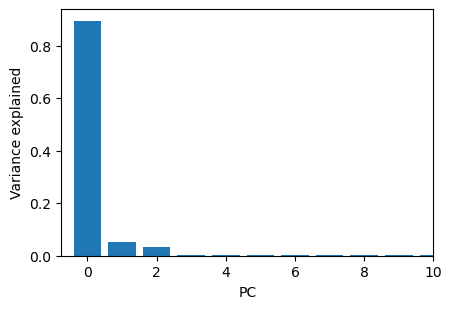

In [57]:
scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(explained_variance_ratios.shape[0]), explained_variance_ratios)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')

In [58]:
def load_numpy(data_path, averaging_size=1):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=0)
    if averaging_size == 1:
        return data
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

In [59]:
output_data = load_numpy(
    '../../results/line_attr_supervised/32_unit_markov_early_endings_test_2024-12-06_09_35_19_995193_var_noise_5e-05_activity_weight_1e-07/outputs/*.npy'
)

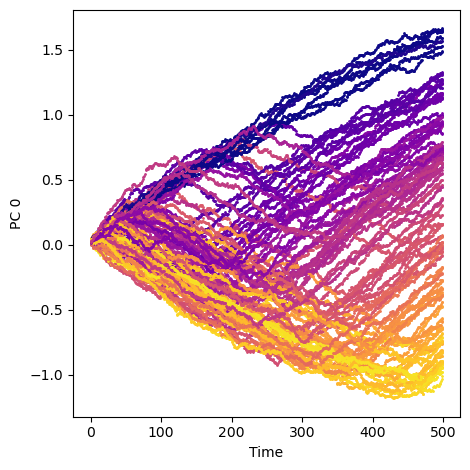

In [60]:
scale = 1.2
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 100))

for trans_mat_idx in range(20):
    for run_idx in range(0, 100, 20):
        for k in np.arange(0, 2, 2):
            cbar = axs.scatter(
                np.arange(data.shape[2]),
                pc_activities[k, run_idx + trans_mat_idx * 100, :],
                s=1,
                color=colors[int(output_data[2 * trans_mat_idx + 1, run_idx] * 100)],
                # vmax=2,
            )
axs.set_xlabel(f'Time')
axs.set_ylabel(f'PC 0')
fig.tight_layout()

[ 1.55223478e-02 -2.58721467e-02 -1.47064561e-02 -1.10607564e-01
 -3.57487202e-02  9.82575957e-03 -1.76812652e-02  2.21238588e-04
  2.98549347e-02 -2.98606515e-01 -1.83888257e-01 -1.29102141e-01
  4.16358739e-01 -8.30778405e-02  4.68505532e-01  2.37640422e-02
  3.12163174e-01  3.65691520e-02  1.79880336e-02 -5.63621670e-02
  1.12552300e-01 -5.75404288e-03  2.16137171e-01  1.80268079e-01
 -3.36634904e-01  2.94106323e-02 -2.83659011e-01  2.28023976e-02
 -2.26823464e-02  2.39728224e-02 -2.36528348e-02 -2.30387941e-01]
[-0.42713386]


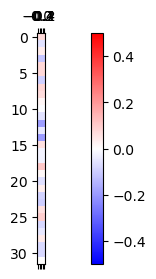

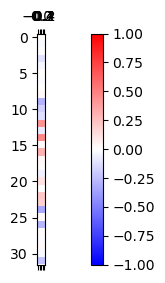

In [61]:
scale = 3
m = 0.5
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
w_ih_trained_n_ = w_ih_trained_n.reshape(HIDDEN_SIZE, 1)
cbar = axs.matshow(w_ih_trained_n_, vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

eigenvectors = np.linalg.eig(w_hh_trained_n).eigenvectors
print(np.real(eigenvectors[:, 0]))
scale = 3
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 1 * scale))
m = 1
cbar = axs.matshow(np.real(eigenvectors[:, 0]).reshape(HIDDEN_SIZE, 1), vmin=-m, vmax=m, cmap='bwr')
plt.colorbar(cbar)

print(np.dot(np.real(eigenvectors[:, 0]), w_ih_trained_n_ / np.linalg.norm(w_ih_trained_n_)))

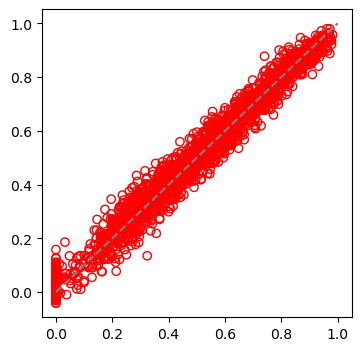

In [62]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

for k in range(0, output_data.shape[0], 2):
    y = output_data[k, ...]
    y_targ = output_data[k+1, ...]

    cbar = axs.scatter(y_targ, y, facecolor='None', edgecolor='red')
axs.plot([0, 1], [0, 1], '--', c='gray')